In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Primeiro passo a entendermos o Streamlit
# doc: https://docs.streamlit.io/

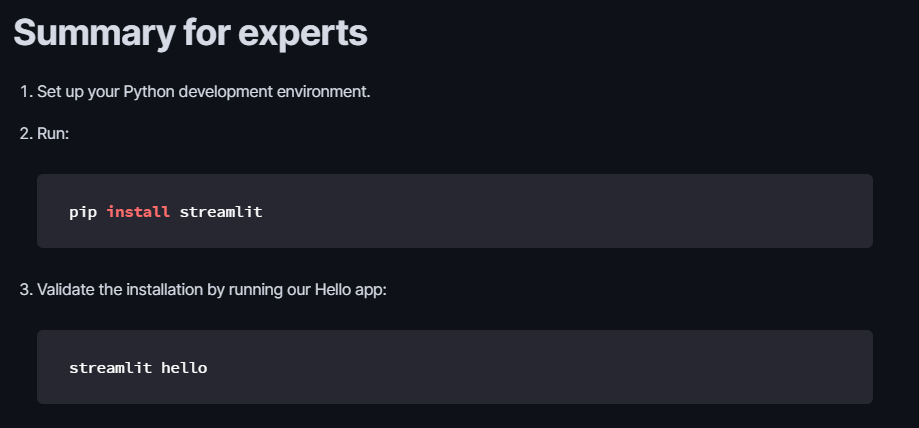

### Funcao para pegar dados de um CSV no AWS S3 

In [76]:
def get_UN_data():
    AWS_BUCKET_URL = "https://aula-unifor.s3.us-east-1.amazonaws.com"
    df = pd.read_csv(AWS_BUCKET_URL + "/housing.csv")
    return df

In [77]:
df = get_UN_data()

In [78]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Tratamento de Dados

In [51]:
# Garantir que os índices são únicos e padronizar para letras minúsculas
df = df.reset_index().drop_duplicates(subset=["fabricante"])
df["fabricante"] = df["fabricante"].str.lower()  # Normalizar para minúsculas
df = df.set_index("fabricante")
df

,index,nome_produto,categoria_produto,preco,quantidade_estoque,data_compra,nome_cliente,faixa_etaria_cliente,genero_cliente,estado_residencia_cliente,meio_pagamento,em_promocao,desconto_maximo,frete_gratis,avaliacao_produto,quantidade_vendida
fabricante,,,,,,,,,,,,,,,,
sony,0,Produto_9654,Jogos,1082.19,4919,2024-07-19,Paula,46-55,Masculino,PR,Cartão de Crédito,False,0.0,True,4,2
panasonic,1,Produto_2334,Brinquedos,344.01,4692,2024-09-11,Lucas,56-65,Masculino,CE,Cartão de Crédito,False,0.0,False,4,4
brastemp,2,Produto_8541,Eletrônicos,975.28,3547,2024-09-18,Lucas,56-65,Masculino,CE,Pix,True,17.4,True,4,9
microsoft,6,Produto_6945,Vestuário,661.59,4925,2024-02-06,Ana,56-65,Feminino,RS,Pix,True,21.6,True,1,6
samsung,7,Produto_7924,Beleza,467.83,409,2024-10-25,Lucas,56-65,Masculino,CE,Transferência Bancária,True,8.1,False,5,8
acer,9,Produto_6430,Eletrodomésticos,615.96,3830,2024-01-26,Thiago,46-55,Outro,SC,Boleto,True,14.4,False,3,6
philips,10,Produto_4189,Esportes,183.72,879,2024-05-14,Carla,18-25,Outro,SC,Boleto,False,0.0,False,1,10
apple,15,Produto_3994,Eletrônicos,1432.99,2182,2024-02-25,Thiago,46-55,Outro,SC,Pix,True,10.3,True,4,5
lg,34,Produto_9446,Beleza,268.10,53,2024-01-30,Pedro,56-65,Feminino,PR,Cartão de Crédito,False,0.0,False,2,7


In [52]:
df[:5]

,index,nome_produto,categoria_produto,preco,quantidade_estoque,data_compra,nome_cliente,faixa_etaria_cliente,genero_cliente,estado_residencia_cliente,meio_pagamento,em_promocao,desconto_maximo,frete_gratis,avaliacao_produto,quantidade_vendida
fabricante,,,,,,,,,,,,,,,,
sony,0,Produto_9654,Jogos,1082.19,4919,2024-07-19,Paula,46-55,Masculino,PR,Cartão de Crédito,False,0.0,True,4,2
panasonic,1,Produto_2334,Brinquedos,344.01,4692,2024-09-11,Lucas,56-65,Masculino,CE,Cartão de Crédito,False,0.0,False,4,4
brastemp,2,Produto_8541,Eletrônicos,975.28,3547,2024-09-18,Lucas,56-65,Masculino,CE,Pix,True,17.4,True,4,9
microsoft,6,Produto_6945,Vestuário,661.59,4925,2024-02-06,Ana,56-65,Feminino,RS,Pix,True,21.6,True,1,6
samsung,7,Produto_7924,Beleza,467.83,409,2024-10-25,Lucas,56-65,Masculino,CE,Transferência Bancária,True,8.1,False,5,8


In [63]:
df_ = df.loc[:, ['quantidade_vendida']]

In [64]:
df_[:5]

,quantidade_vendida
fabricante,
sony,2
panasonic,4
brastemp,9
microsoft,6
samsung,8


In [65]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, sony to nokia
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   quantidade_vendida  10 non-null     int64
dtypes: int64(1)
memory usage: 460.0+ bytes


In [67]:
dados = df_.T.reset_index().rename(columns={"index": "Metric"})
dados_melted = pd.melt(dados, id_vars=["Metric"], var_name="Fabricante", value_name="Valor")

In [68]:
df_.T

fabricante,sony,panasonic,brastemp,microsoft,samsung,acer,philips,apple,lg,nokia
quantidade_vendida,2,4,9,6,8,6,10,5,7,4


In [69]:
dados_melted

,Metric,Fabricante,Valor
0,quantidade_vendida,sony,2
1,quantidade_vendida,panasonic,4
2,quantidade_vendida,brastemp,9
3,quantidade_vendida,microsoft,6
4,quantidade_vendida,samsung,8
5,quantidade_vendida,acer,6
6,quantidade_vendida,philips,10
7,quantidade_vendida,apple,5
8,quantidade_vendida,lg,7
9,quantidade_vendida,nokia,4


In [75]:
df.groupby(["categoria_produto"]).agg({"avaliacao_produto":"mean"}).reset_index()

,categoria_produto,avaliacao_produto
0,Beleza,3.021390
1,Brinquedos,2.987549
2,Eletrodomésticos,2.959350
3,Eletrônicos,3.000000
4,Esportes,3.010695
5,Jogos,2.982379
6,Móveis,3.006390
7,Vestuário,3.008397
